# 1. Remove dataset downloaded for previous colab session.

In [83]:
#!rm -r /content/surgical-mask-detection-dataset/

# 2. Clone a GitHub repository for dataset.

In [84]:
!git clone https://github.com/YongLS/surgical-mask-detection.git

Cloning into 'surgical-mask-detection'...
remote: Enumerating objects: 1947, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 1947 (delta 1), reused 0 (delta 0), pack-reused 1927
Receiving objects: 100% (1947/1947), 54.72 MiB | 30.08 MiB/s, done.
Resolving deltas: 100% (20/20), done.


# 3. Print the current working directory.

In [85]:
!pwd

/content


# 4. List the contents of current working directory.

In [86]:
!ls

0_0_caiguoqing_0067.jpg    sample_data
0_0_caiguoqing_0067.jpg.1  surgical-mask-detection


# 5. Move the dataset to "/content/" and remove the cloned GitHub repository.

In [87]:
!mv /content/surgical-mask-detection/dataset/ /content/surgical-mask-detection-dataset && rm -r /content/surgical-mask-detection/

# 6. List the contents of current working directory.

In [88]:
!ls

0_0_caiguoqing_0067.jpg    sample_data
0_0_caiguoqing_0067.jpg.1  surgical-mask-detection-dataset


# 7. Print the number of directories and images in "./surgical-mask-detection-dataset/".

In [89]:
import os

for dirpath, dirnames, filenames in os.walk("surgical-mask-detection-dataset"):
  print(f"There are {len(dirnames)} of directories and {len(filenames)} images in '{dirpath}'.")

There are 2 of directories and 0 images in 'surgical-mask-detection-dataset'.
There are 3 of directories and 0 images in 'surgical-mask-detection-dataset/test'.
There are 0 of directories and 100 images in 'surgical-mask-detection-dataset/test/surgical_mask'.
There are 0 of directories and 100 images in 'surgical-mask-detection-dataset/test/non-surgical_mask'.
There are 0 of directories and 100 images in 'surgical-mask-detection-dataset/test/no_mask'.
There are 3 of directories and 0 images in 'surgical-mask-detection-dataset/train'.
There are 0 of directories and 500 images in 'surgical-mask-detection-dataset/train/surgical_mask'.
There are 0 of directories and 500 images in 'surgical-mask-detection-dataset/train/non-surgical_mask'.
There are 0 of directories and 500 images in 'surgical-mask-detection-dataset/train/no_mask'.


# 8. Define the paths to training & testing datasets.

In [90]:
train_dir = "surgical-mask-detection-dataset/train/"
test_dir = "surgical-mask-detection-dataset/test/"

# 9. Print the labels / name of classes.

In [91]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['no_mask' 'non-surgical_mask' 'surgical_mask']


# 10. Create a function to randomly display three images from each class i.e. each image of "no_mask", "non-surgical_mask" and "surgical_mask".

In [92]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, class_names):

  for i in range(len(class_names)):
    
    target_folder = target_dir + class_names[i]

    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    
    plt.subplot(1, 3, i+1)
    plt.subplots_adjust(right=1.25)
    plt.imshow(img)
    plt.title(f"{class_names[i]} \n image shape: {img.shape}")
    plt.axis("off")

  plt.show();

# 11. Display three images of each class from training dataset.

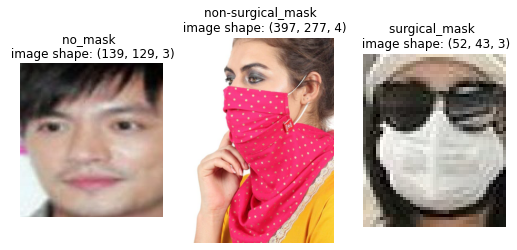

In [93]:
view_random_image(target_dir=train_dir, 
                  class_names=class_names)

# 12. Display three images of each class from testing dataset.

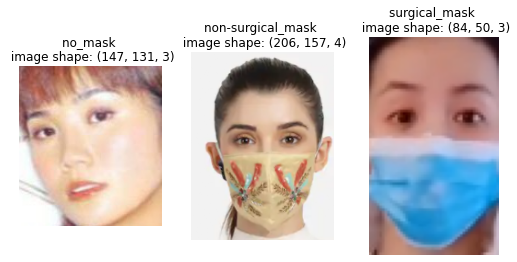

In [94]:
view_random_image(target_dir=test_dir, 
                  class_names=class_names)

# 13. Preprocessing data: Loading dataset by ImageDataGenerator with rescaling / normalization.

In [95]:
#import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

#train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 #image_size=(224, 224),
                                                                 #label_mode="categorical",
                                                                 #batch_size=32,
                                                                 #color_mode="rgb")            

#test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                #image_size=(224, 224),
                                                                #label_mode="categorical",
                                                                #color_mode="rgb")                                

Found 1500 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


# 14. Create and compile a primitive Convolutional Neural-Net (CNN) similar to Tiny-VGG architecture. 

In [96]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model_1 = Sequential([
  #Rescaling(1./255),    
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), 
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),             
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')                     
])

model_1.compile(loss="categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 15. Fit the model with the training dataset. 

In [97]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
18/47 [==========>...................] - ETA: 2s - loss: 1.1207 - accuracy: 0.4738

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


47/47 [==============================] - 6s 121ms/step - loss: 0.8603 - accuracy: 0.6280 - val_loss: 0.6028 - val_accuracy: 0.7767
Epoch 2/5
47/47 [==============================] - 6s 116ms/step - loss: 0.4712 - accuracy: 0.8313 - val_loss: 0.3096 - val_accuracy: 0.8933
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.3490 - accuracy: 0.8720 - val_loss: 0.2937 - val_accuracy: 0.8933
Epoch 4/5
47/47 [==============================] - 5s 115ms/step - loss: 0.2676 - accuracy: 0.9033 - val_loss: 0.2705 - val_accuracy: 0.9133
Epoch 5/5
47/47 [==============================] - 5s 114ms/step - loss: 0.1963 - accuracy: 0.9333 - val_loss: 0.2395 - val_accuracy: 0.9133


# 16. View the model architecture.

In [98]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28090)            

# 17. Evaluate the model's loss and accuracy metrics on testing data.

In [99]:
model_1.evaluate(test_data)

10/10 [==============================] - 1s 72ms/step - loss: 0.2395 - accuracy: 0.9133


[0.23951491713523865, 0.9133333563804626]

# 18. Create a function which plot the loss and accuracy curves.

In [100]:
def plot_loss_and_accuracy_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()
  plt.subplots_adjust(right=2)

  plt.show();

# 19. Plot the loss and accuracy curves.

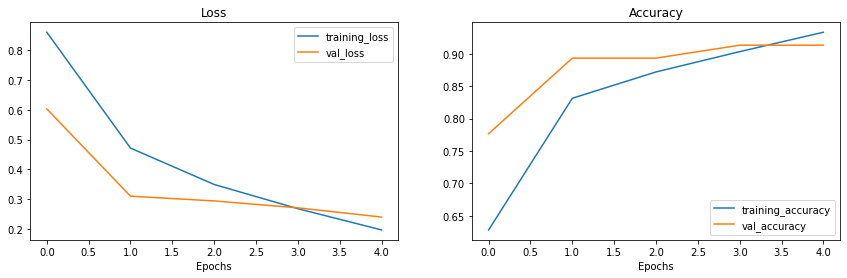

In [101]:
plot_loss_and_accuracy_curves(history_1)

# 20. Create a function which makes prediction on a randomly selected image.

In [102]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

def plot_random_image_with_prediction(model, target_dir, class_names, img_shape=224):

  random_class_name = class_names[random.randint(0, 2)]
  target_folder = target_dir + random_class_name

  random_image = random.sample(os.listdir(target_folder), 1)
  print(f"{random_image[0]} \n")
  img = mpimg.imread(target_folder + "/" + random_image[0])
  #img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

  img = tf.image.resize(img, [img_shape, img_shape])
  img = img/255.

  pred = model.predict(tf.expand_dims(img, axis=0))

  print(f"{pred} \n")

  if len(pred[0]) > 1:
    pred_class = class_names[pred.argmax()]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction: \n {pred_class} ({round(pred[0][pred.argmax()]*100, 2)}%)", color="black")
  plt.axis(False);

# 21. Check the class names.

In [103]:
class_names

array(['no_mask', 'non-surgical_mask', 'surgical_mask'], dtype='<U17')

# 22. Make a prediction on a randomly selected image. <br> 
### Execute this code cell multiple times to view predictions on different randomly selected images. <br>
### Plese skip through / execute this code cell again whenever exception is raised or the image is blank white / black --> it's due to some images in the dataset are having transparency / alpha channel value.  

0_0_8 copy 11.jpg 

[[0.00416183 0.09598709 0.8998511 ]] 



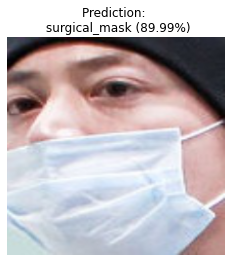

In [104]:
plot_random_image_with_prediction(model_1, test_dir, class_names)

# 23. Create functions which loads / downloads a dedicated image and display the image along with the model's prediction.

In [105]:
import tensorflow as tf
import matplotlib.pyplot as plt

def load_and_prep_image(filename, img_shape=224):

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)

  img = tf.image.resize(img, [img_shape, img_shape])
  img = img/255.

  return img

def pred_and_plot(model, filename, class_names):

  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[pred.argmax()]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction: \n {pred_class} ({round(pred[0][pred.argmax()]*100, 2)}%)", color="black")
  plt.axis(False);

# 24. Download a dedicated image for prediction. <br>
### The example below illustrates a dedicated image loaded into colab with a github URL.
### This line of code is commented to prevent multiple download of the file. Uncomment it at first run of the code.  

In [106]:
!wget "https://raw.githubusercontent.com/YongLS/surgical-mask-detection/main/dataset/test/no_mask/0_0_caiguoqing_0067.jpg"

--2021-06-06 09:34:18--  https://raw.githubusercontent.com/YongLS/surgical-mask-detection/main/dataset/test/no_mask/0_0_caiguoqing_0067.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9489 (9.3K) [image/jpeg]
Saving to: ‘0_0_caiguoqing_0067.jpg.2’

0_0_caiguoqing_0067 100%[===================>]   9.27K  --.-KB/s    in 0s      

2021-06-06 09:34:18 (93.8 MB/s) - ‘0_0_caiguoqing_0067.jpg.2’ saved [9489/9489]



# 25. Display the dedicated image along with the model's prediction. <br>
### This line of code is commented to prevent execution if no dedicated image is downloaded.

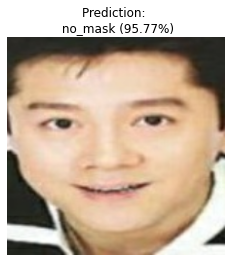

In [107]:
pred_and_plot(model_1, '0_0_caiguoqing_0067.jpg', class_names)

# 26. Create a function to display the confusion matrix. 

In [108]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def make_confusion_matrix(true, pred, classes=None, figsize=(10, 10), text_size=15):

  cm = confusion_matrix(true, pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1) [:, np.newaxis]

  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 

  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), 
         yticks=np.arange(n_classes), 
         xticklabels=labels, 
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)", 
            horizontalalignment="center", 
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

# 27. Make and display the confusion matrix.

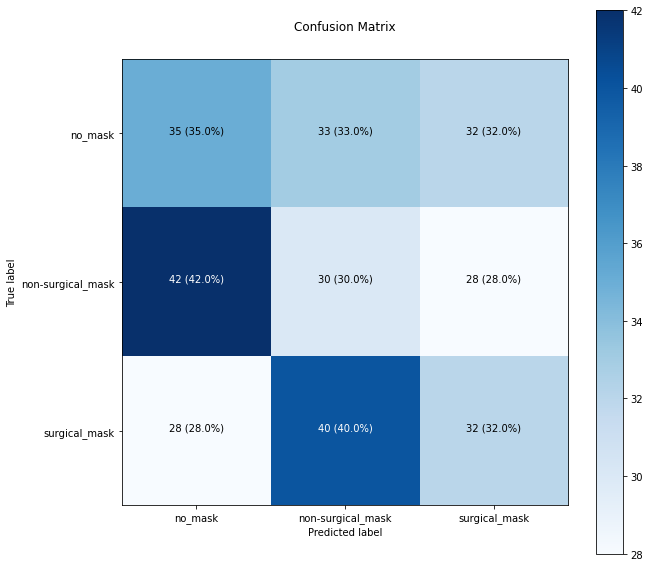

In [109]:
probs = model_1.predict(test_data)

preds = probs.argmax(axis=1)

#print(preds)
#print(test_data.classes)

make_confusion_matrix(true=test_data.classes,
                      pred=preds,
                      classes=class_names.tolist(),
                      figsize=(10, 10),
                      text_size=10)